

# Project: Investigate the Dataset: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have selected the No-show appointment dataset for this project. 

>Based on the data provided in the dataset, I would like to see the ratio of no-shows based on age ranges, scholarship, gender, and days in advance the appointment was scheduled. In this case pretty much all the variables are independent except for the no-show column.

>Items that I would like to explore:
- Ratio between age range and show/no-shows
- Ratio between diseases and show/no-shows
- Ratio between the lapse in scheduled appointment vs appointment day and the show/no-shows
- Gender distribution in the show/no-shows 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

> Loaded the file and gave a glance to the data using to head and info basically to see the data and datatypes used.

In [2]:
df = pd.read_csv('noshow-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




### Data Cleaning



### Changed the columns to lower case and word separation using underline.

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [7]:
df.rename(columns={'patientid': 'patient_id', 
                   'appointmentid': 'appointment_id', 
                   'scheduledday': 'scheduled_day',
                   'appointmentday': 'appointment_day',
                   'hipertension': 'hypertension',
                   'no-show': 'no_show'}, 
                    inplace=True)

### No NAs in the dataframe and no duplicated either. Since I am not using the patiend_id nor appointment_id I wondered if I should had removed those 2 columns and then ran the find duplicates again. That is part of my inexperience with defining which columns to use when cleaning the data.

In [8]:
df.isna().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handcap            0
sms_received       0
no_show            0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Changed datatype of the dates to actual datetime

In [10]:
df.appointment_day = pd.to_datetime(df.appointment_day)
df.appointment_day.dtype

dtype('<M8[ns]')

In [11]:
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.scheduled_day.dtype

dtype('<M8[ns]')

### Ran the describe function to give a glance to the numerical values and their statistics.

In [12]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 ### I noticed that there was a record with a negative age. I removed it because it was only one record.

In [13]:
df.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df.drop(index=99832, inplace=True)

### I created a function to be able to compute the difference in days between when the appointment was scheduled and the actual day of the appointment.

In [15]:
def no_show_binary(no_show):
    if no_show == 'No':
        return 1
    else: return 0

In [16]:
df['no_show_binary'] = df.no_show.apply(no_show_binary)

In [17]:
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,no_show_binary
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1


### I dropped columns patiend_id and the original no_show columns because I am not going to use them for the EDA.

In [18]:
df.drop(columns = ['patient_id', 'no_show'], inplace=True)

In [19]:
df.head(2)

,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show_binary
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1


### Added a column to classify the age of the patients into Minor, Young Adult, Adult, Seniour and Elderly.

In [20]:
bin_edges = [0, 17, 40, 60, 80, 120]
bin_names = ['minor', 'young adult', 'adult', 'seniour', 'elderly']
df['age_level'] = pd.cut(df['age'], bin_edges, labels=bin_names, include_lowest=True)

### Calculated the difference in days betweeen when the date the appointment was schedued and the actual appointment date. Then I found out that there were a couple of records where the actual appointment date was before the date the appointment was scheduled and decided to drop those records.

In [21]:
df['date_gap'] = df.appointment_day - pd.Series(df.scheduled_day).dt.floor('D')

In [22]:
df.date_gap.describe()

count                     110526
mean     10 days 04:24:39.789370
std      15 days 06:07:14.979140
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: date_gap, dtype: object

In [23]:
df.date_gap.dtype

dtype('<m8[ns]')

In [24]:
df['date_gap_days'] = pd.Series(df.date_gap).dt.floor('D').dt.days

### Created categories based on the waiting time between the scheduled date and appointment date. I used the percentiles to define the values to use in the bin edges.

In [25]:
bin_edges = [dt.timedelta(days=0),
             dt.timedelta(days=4),
             dt.timedelta(days=15),
             dt.timedelta(days=179)]

In [26]:
bin_names = ['short_gap', 'medium_gap', 'long_gap']

In [27]:
df['gap_size'] = pd.cut(df['date_gap'], bin_edges, labels=bin_names, include_lowest=True)

### Reviewed if there were any NAs. Those were values where the actual appointment date was before the date the appointment was scheduled and decided to drop those records.

In [28]:
df.gap_size.isna().sum()

5

In [29]:
df.dropna(inplace=True)

In [30]:
df.gap_size.isna().sum()

0

### Numpy

In [31]:
np_vals = df.age.values

In [32]:
type(eval('np_vals'))

numpy.ndarray

In [33]:
np_vals

array([62, 56, 62, ..., 21, 38, 54])

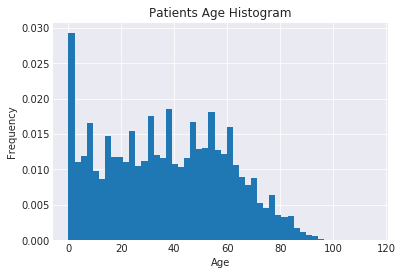

In [34]:
plt.hist(np_vals, bins=50, density=1)
plt.title('Patients Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency');

In [35]:
np.info(np_vals)

class:  ndarray
shape:  (110521,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x47206e8
byteorder:  little
byteswap:  False
type: int64


In [36]:
np.max(np_vals)

115

In [37]:
np.min(np_vals)

0

In [38]:
np.mean(np_vals)

37.089385727599279

In [39]:
np.median(np_vals)

37.0

In [40]:
np.percentile(np_vals, 25)

18.0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1. Lag time vs attended appointments relationship.

>Based on the table results using the group by function and the plot it can be seen that there are more missed appointments when the lag time is longer.

#### This graph below shows that even though most of the appointments are scheduled close to the appointment date, there are still considerable number of appointments scheduled way before the appointment date. 

#### In the next section we will see the ratio of appointments missed based on the classification of lags.

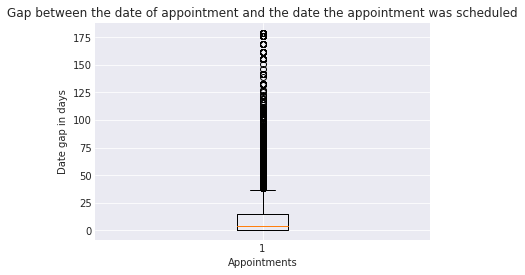

In [41]:
plt.boxplot(df.date_gap_days);
plt.title('Gap between the date of appointment and the date the appointment was scheduled')
plt.xlabel('Appointments')
plt.ylabel('Date gap in days');

In [42]:
gap_size_no_show_means = df.groupby('gap_size').no_show_binary.mean()
gap_size_no_show_means

gap_size
short_gap     0.890956
medium_gap    0.714619
long_gap      0.672941
Name: no_show_binary, dtype: float64

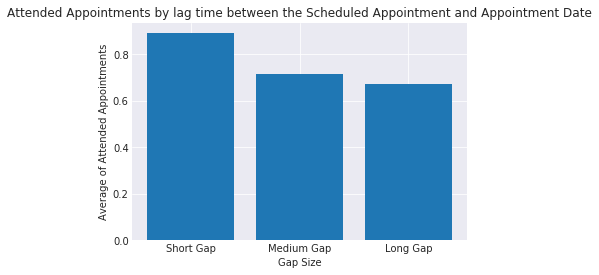

In [43]:
locations = [1,2,3]
heights = gap_size_no_show_means
labels = ['Short Gap', 'Medium Gap', 'Long Gap'] #gap_size_no_show_means.index.str.replace('_', ' ').str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Attended Appointments by lag time between the Scheduled Appointment and Appointment Date')
plt.xlabel('Gap Size')
plt.ylabel('Average of Attended Appointments');


### Research Question 2. Patient's Age vs attended appointments relationship.

>Based on the table results using the group by function and the plot it can be seen that the people categorized as Seniour have more attendance to their scheduled appointments whereas the people categorized as young adult have the less attendance to their scheduled appointments.

In [44]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
age_level_no_show_means = df.groupby('age_level').no_show_binary.mean()
age_level_no_show_means

age_level
minor          0.780992
young adult    0.768115
adult          0.814135
seniour        0.849970
elderly        0.835847
Name: no_show_binary, dtype: float64

In [45]:
age_level_no_show_means.index

CategoricalIndex(['minor', 'young adult', 'adult', 'seniour', 'elderly'], categories=['minor', 'young adult', 'adult', 'seniour', 'elderly'], ordered=True, name='age_level', dtype='category')

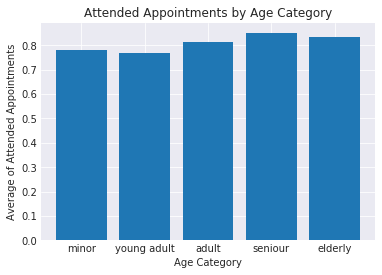

In [46]:
locations = [1,2,3,4,5]
heights = age_level_no_show_means
labels = ['minor', 'young adult', 'adult', 'seniour', 'elderly'] 
plt.bar(locations, heights, tick_label=labels)
plt.title('Attended Appointments by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average of Attended Appointments');


### Research Question 3. What other of the available variables seem to have correlation with the show/no show to a scheduled appointment.

>For this last question, I ran the groupby function using the other available variables. From the looks of it, other than the Handcap it seems like the numbers do not change much based on the category. 

In [47]:
df.groupby('gender').no_show_binary.mean()

gender
F    0.796885
M    0.800362
Name: no_show_binary, dtype: float64

In [48]:
df.groupby('hypertension').no_show_binary.mean()

hypertension
0    0.791005
1    0.826980
Name: no_show_binary, dtype: float64

In [49]:
df.groupby('diabetes').no_show_binary.mean()

diabetes
0    0.796409
1    0.819967
Name: no_show_binary, dtype: float64

In [50]:
df.groupby('alcoholism').no_show_binary.mean()

alcoholism
0    0.798089
1    0.798512
Name: no_show_binary, dtype: float64

In [51]:
handcap_level_no_show_means = df.groupby('handcap').no_show_binary.mean()
handcap_level_no_show_means

handcap
0    0.797667
1    0.821569
2    0.797814
3    0.769231
4    0.666667
Name: no_show_binary, dtype: float64

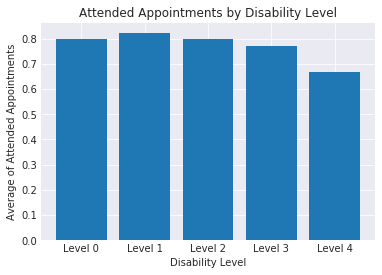

In [52]:
locations = [1,2,3,4,5]
heights = handcap_level_no_show_means
labels = ['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4'] 
plt.bar(locations, heights, tick_label=labels)
plt.title('Attended Appointments by Disability Level')
plt.xlabel('Disability Level')
plt.ylabel('Average of Attended Appointments')
plt.autoscale()

<a id='conclusions'></a>
## Conclusions

In this project the main objective was to apply EDA to a selected dataset. No conclusions of causation were derived. The exercise was mainly to analyze the data as-is. 

Based on that:
- The variable that seemed to have more no-shows was the one associated with the disability. About 66% of the scheduled appointments for the Level 4 disability had no attendance. 

- The other variable that was analyzed and showed a higher number of no-attendances compared to other that were analyzed was the waiting time (lag time) between the date the appointment was scheduled and the date of the actual appointment.

- Other variables were analyzed, as the Age Category, in this we can see that the young adults are the ones that missed more appointments.

- Some of the other diseases were analyzed at a high level but did not show much difference in attendance between people with the disease and people without the disease.


## Limitations

About 25% of the patients are minors. That means that most likely an adult scheduled the appointment and also was responsible to take the minor to the appointment. It would have been good to have the age of the responsible adult to see how that would have played on the show/no-show. 

The number of observations that had to be discarded was very minimal. 
